In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Populating the interactive namespace from numpy and matplotlib


In [2]:

PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500PR.csv")
HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500HR.csv")

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsPR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsHR.csv")


RT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsRAW.csv")
FT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsFIN.csv")

In [3]:
# This is data set of previously financially filtered data.Empty 
# tone suggests that at that time no financial info was available about such so the value is 0
PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)

In [4]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,-3.846154,3.550296,7.39645,10.946746,27.218935,0.0,NaN,0.000934
1,2016-02-29 00:45:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
2,2016-02-29 01:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
3,2016-02-29 01:15:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
4,2016-02-29 01:30:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,NaN


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


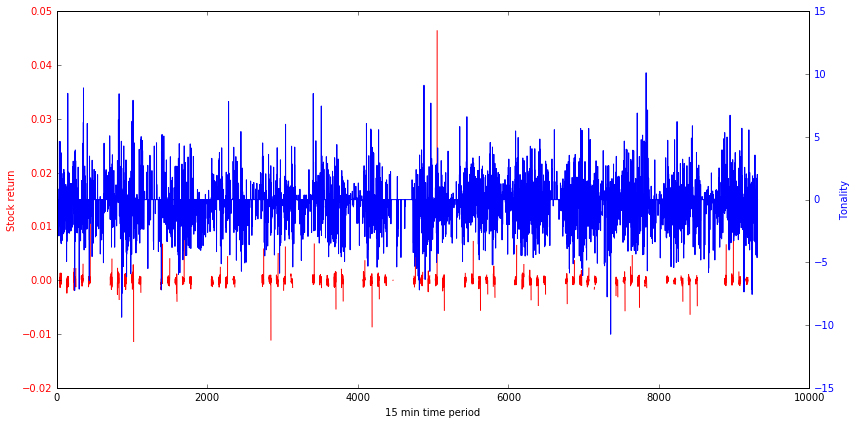

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(PR.tone)+1, 1)
tone = PR.tone
s_return = PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
print(adfuller(HR.tone))
diff_tn = HR.tone.diff(1)
HR.tone = diff_tn
HR = HR[1:]
HR.reset_index(drop=True)
adfuller(HR.tone)

(-14.902086171565294, 1.5017449650715786e-27, 23, 9286, {'10%': -2.5669357013244007, '1%': -3.4310544054047631, '5%': -2.861851302651254}, 32213.694386423838)


(-24.235468517455452,
 0.0,
 38,
 9270,
 {'1%': -3.4310556215438885,
  '10%': -2.5669359873808517,
  '5%': -2.8618518400440265},
 32382.72593181314)

In [8]:
# print(adfuller(PR.tone))
# diff_tn = PR.tone.diff(1)
# PR.tone = diff_tn
# PR = PR[1:]
# PR.reset_index(drop=True)
# adfuller(PR.tone)

In [9]:
print(adfuller(RT.tone))
diff_tn = RT.tone.diff(1)
RT.tone = diff_tn
RT = RT[1:]
RT.reset_index(drop=True)
adfuller(RT.tone)

(-10.256301683903967, 4.3522566436674744e-18, 27, 9283, {'10%': -2.5669357548848586, '1%': -3.4310546331114309, '5%': -2.8618514032712694}, 14432.743274101)


(-23.387178850275472,
 0.0,
 38,
 9271,
 {'1%': -3.4310555454121809,
  '10%': -2.5669359694733913,
  '5%': -2.8618518064026275},
 14506.531043636347)

In [10]:
print(adfuller(FT.tone))
diff_tn = FT.tone.diff(1)
FT.tone = diff_tn
FT = FT[1:]
FT.reset_index(drop=True)
adfuller(FT.tone)

(-12.283026605933156, 8.1422559546756687e-23, 29, 9281, {'10%': -2.5669357906110712, '1%': -3.4310547849976811, '5%': -2.8618514703874243}, 30544.97367060322)


(-23.815819596705374,
 0.0,
 37,
 9272,
 {'1%': -3.4310554692968998,
  '10%': -2.5669359515697945,
  '5%': -2.8618517727684862},
 30676.8127488891)

In [11]:
# PR.to_csv("PR.csv",  index=False)
# HR.to_csv("HR.csv",  index=False)
# RT.to_csv("RAW.csv",  index=False)
# FT.to_csv("FIN.csv",  index=False)

#PR.loc[abs(PR['weight']) < 0.001, 'tone'] = 0
#HR.loc[abs(HR['weight']) > 0.0005, 'tone'] = 0

In [12]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,-3.846154,3.550296,7.39645,10.946746,27.218935,0.0,NaN,0.000934
1,2016-02-29 00:45:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
2,2016-02-29 01:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
3,2016-02-29 01:15:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,0.000000
4,2016-02-29 01:30:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,NaN,NaN


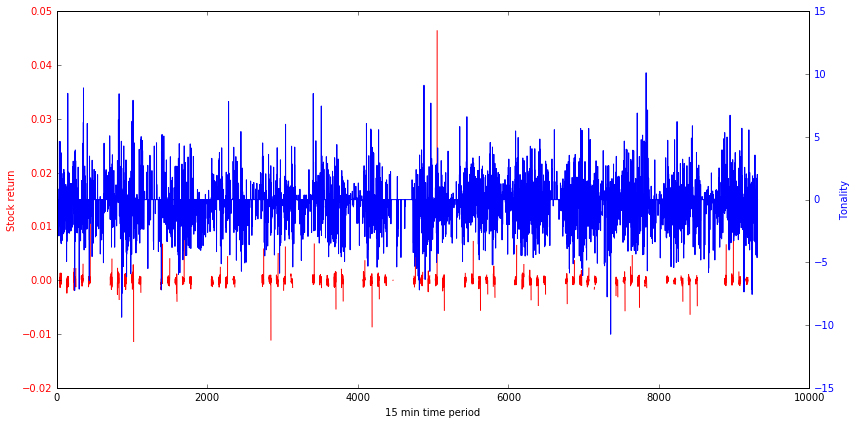

In [13]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(PR.tone)+1, 1)
tone = PR.tone
s_return = PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Stock return & Tone  Pearson correlation

In [14]:

print("Raw:  " + str(RT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial:  " + str(FT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Harmonics:  " + str(HR[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Page Rank:  " + str(PR[['tone', 'fin_return']].corr().values[0][1]))

Raw:  0.0114789118991
Financial:  0.00246968483133
Financial & Harmonics:  0.011822413114
Financial & Page Rank:  0.00153677360883


## Previous Time Stamp observation

In [15]:
from pandas.plotting import lag_plot
def plot_logs(datafr= None):

    matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3,figsize=(15, 15)) 

    lag_plot(datafr.tone, ax=ax1)
    lag_plot(datafr.polarity, ax=ax2)
    lag_plot(datafr.positive, ax=ax3)
    lag_plot(datafr.negative, ax=ax4)
    lag_plot(datafr.activ_den, ax=ax5)
    lag_plot(datafr.self_den, ax=ax6)

    ax1.set_title("Tone")
    ax2.set_title("Polarity")
    ax3.set_title("Positive")
    ax4.set_title("Negative")
    ax5.set_title("Active dencity")
    ax6.set_title("Self-dencity")

    fig.tight_layout()

###  RAW

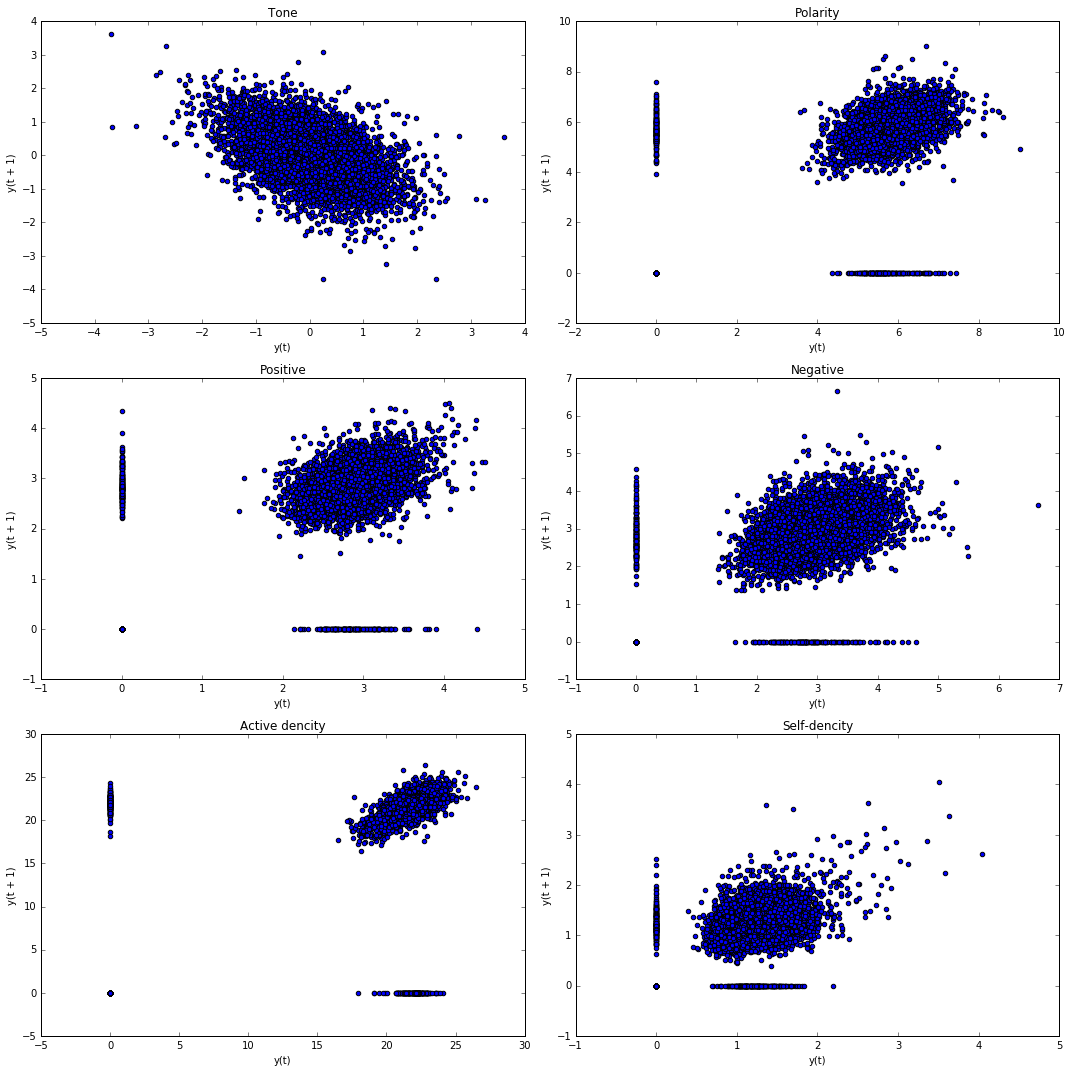

In [16]:
plot_logs(RT)

### Financial

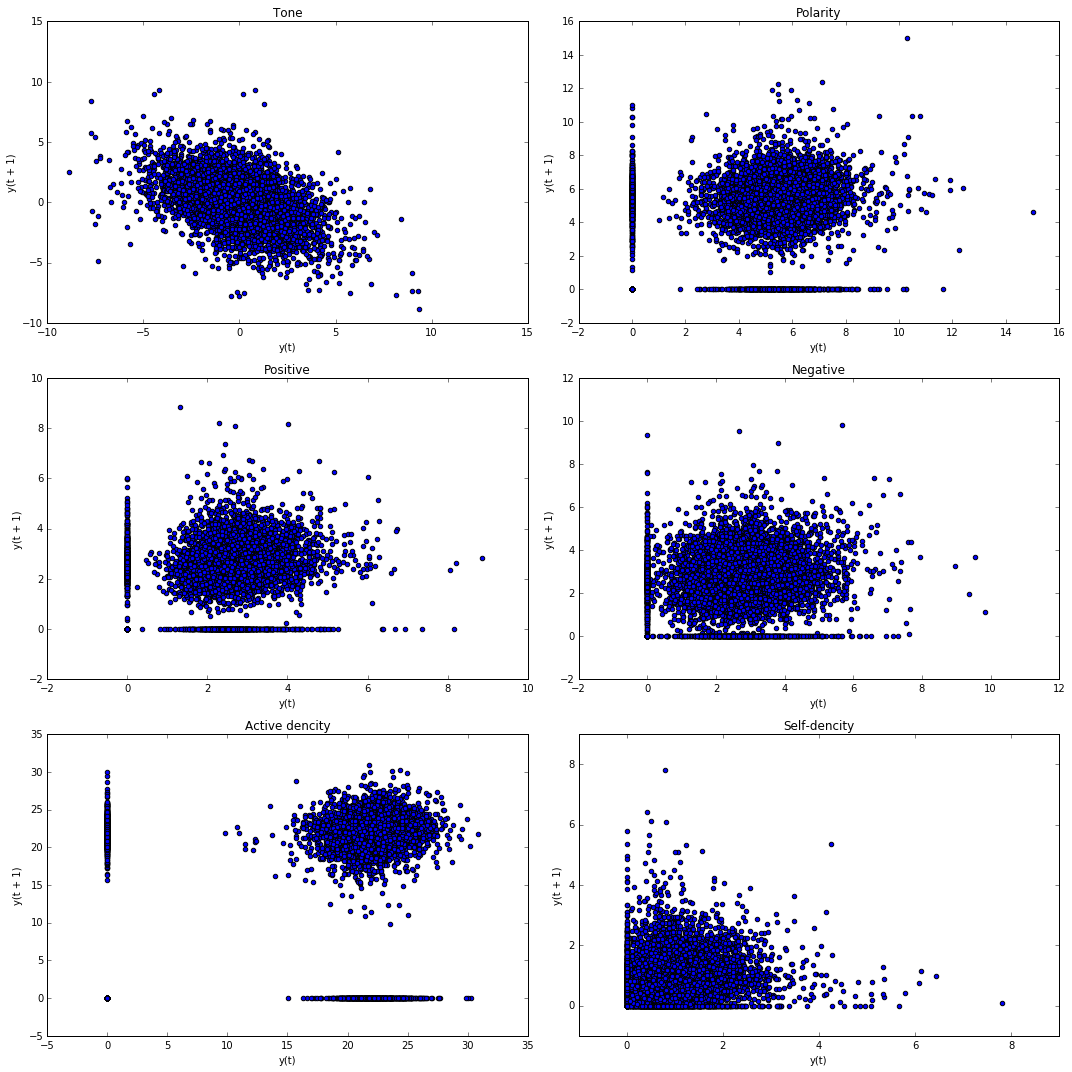

In [17]:
plot_logs(FT)

### Financial & Page Rank

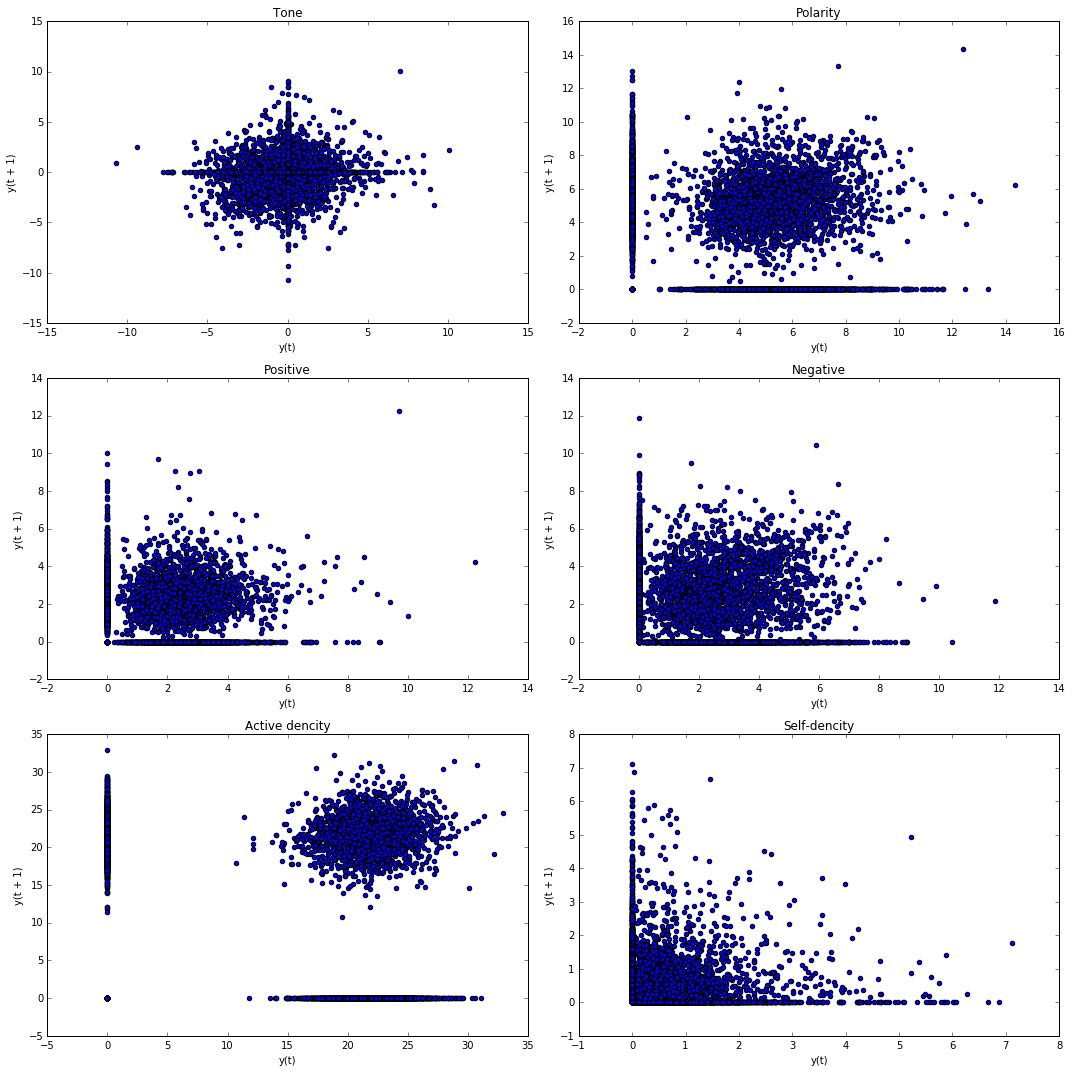

In [18]:
plot_logs(PR)

### Financial & Harmonics

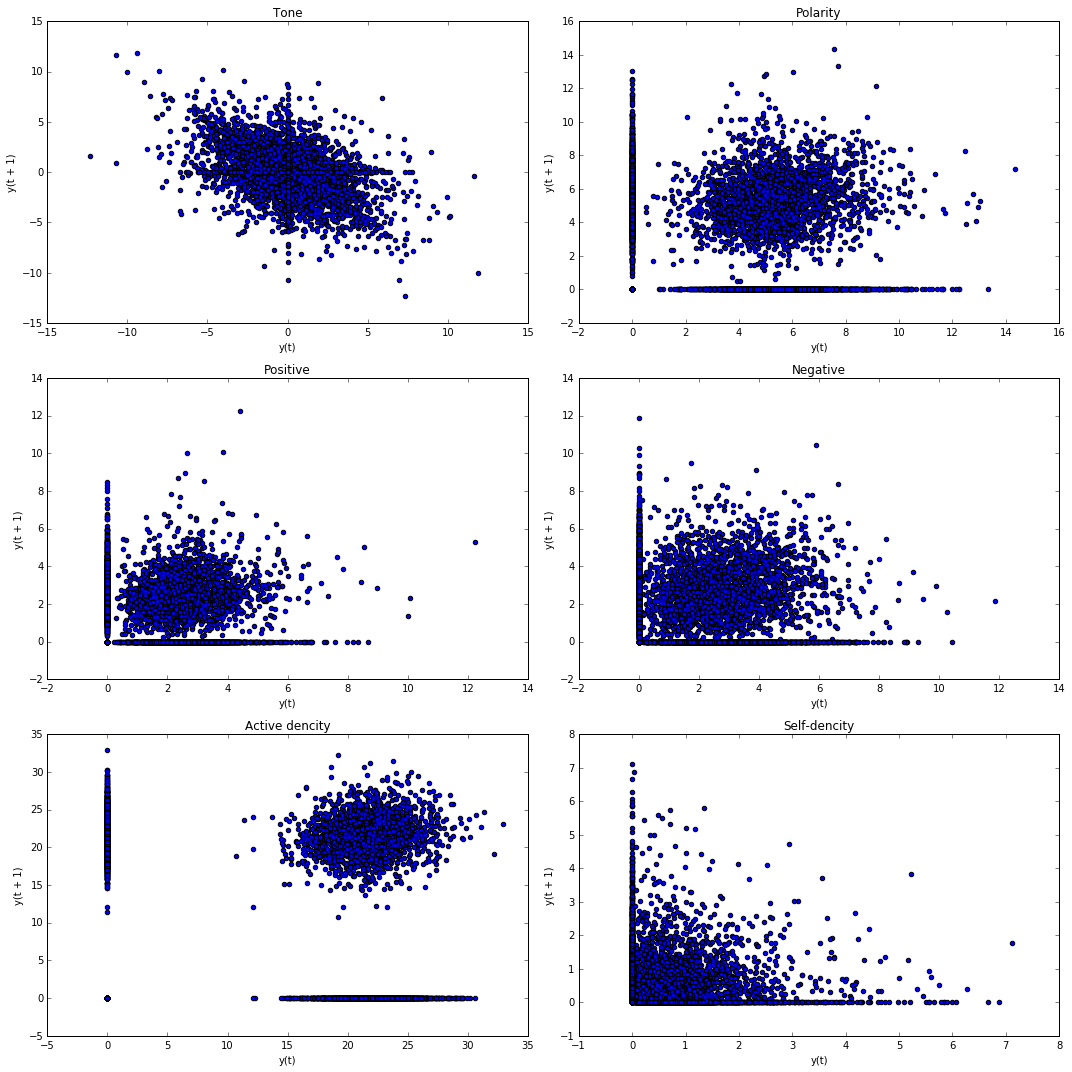

In [19]:
plot_logs(HR)

## Tone Autocorrelation

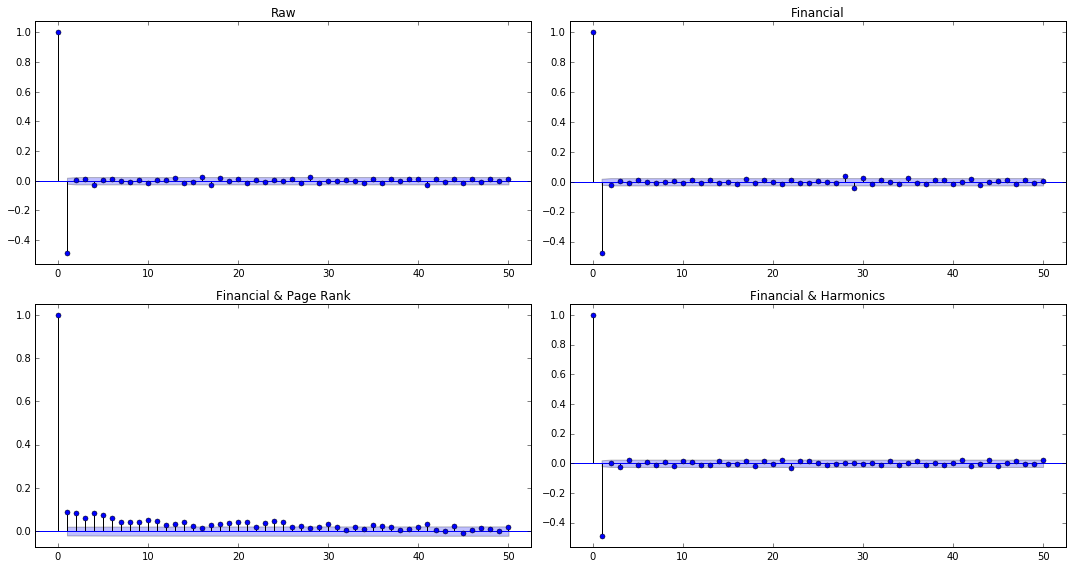

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(15, 8)) 

plot_acf(RT.tone,  lags=50, ax=ax1)
plot_acf(FT.tone,  lags=50, ax=ax2)
plot_acf(PR.tone,  lags=50, ax=ax3)
plot_acf(HR.tone,  lags=50, ax=ax4)


ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")


fig.tight_layout()

## TONE & Stock Return cross-correlation

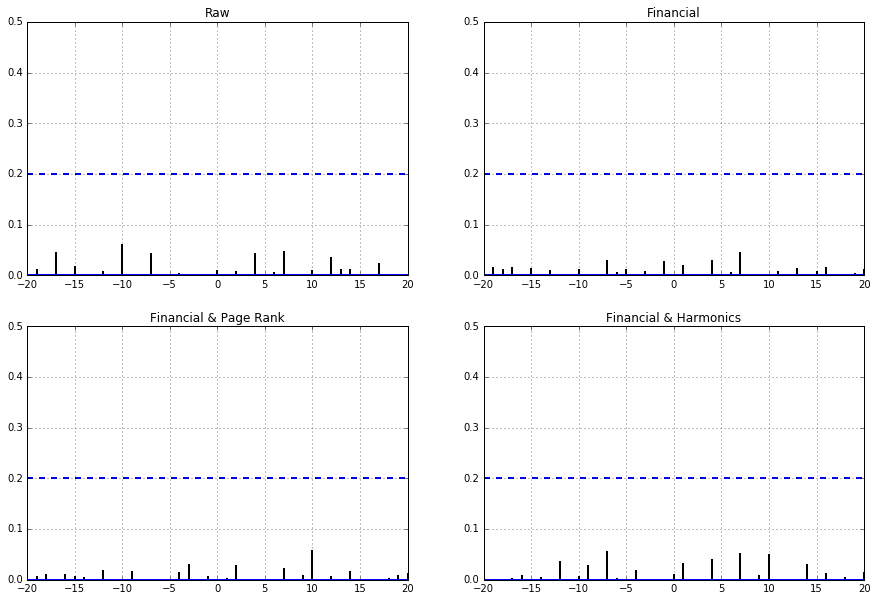

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))

ax1.xcorr(RT[RT.fin_return.notnull()].tone, RT[RT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax1.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax1.grid(True)
ax1.set_ylim([0, 0.5])
ax1.set_title("Raw")

ax2.xcorr(FT[FT.fin_return.notnull()].tone, FT[FT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax2.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax2.grid(True)
ax2.set_ylim([0, 0.5])
ax2.set_title("Financial")

ax3.xcorr(PR[PR.fin_return.notnull()].tone, PR[PR.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax3.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax3.grid(True)
ax3.set_ylim([0, 0.5])
ax3.set_title("Financial & Page Rank")


ax4.xcorr(HR[HR.fin_return.notnull()].tone, HR[HR.fin_return.notnull()].fin_return, usevlines=True, normed=True, maxlags=20, lw=2)
ax4.grid(True)
ax4.axhline(0.2, color='blue', linestyle='dashed', lw=2)
ax4.set_ylim([0, 0.5])
ax4.set_title("Financial & Harmonics")



In [26]:
fil_PR = PR[PR.fin_return.notnull()][:200]

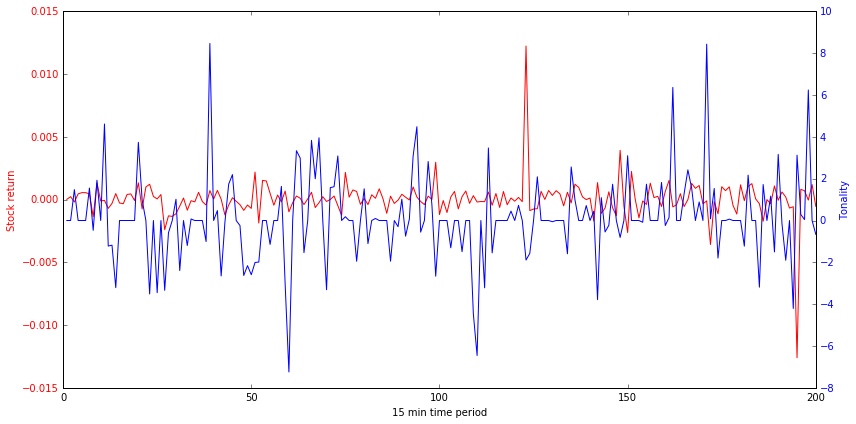

In [27]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(fil_PR.tone)+1, 1)
tone = fil_PR.tone
s_return = fil_PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, fil_PR.fin_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Quantile Regression

In [24]:
def quant_reg_plot(dataFR, feature):
    
    mod = smf.quantreg( 'fin_return ~ '+ feature, dataFR)

    quantiles = np.arange(0.1, 1, 0.1)

    models = []
    params = []

    for qt in quantiles:
        res = mod.fit(q = qt)
        models.append(res)
        params.append([qt, res.params['Intercept'], res.params[feature]] + res.conf_int().loc[feature].tolist())
    params = pd.DataFrame(data=params, columns=['qt', 'inter', 'x_coef', 'lower_percentile', 'upper_percentile'])
    
    return params

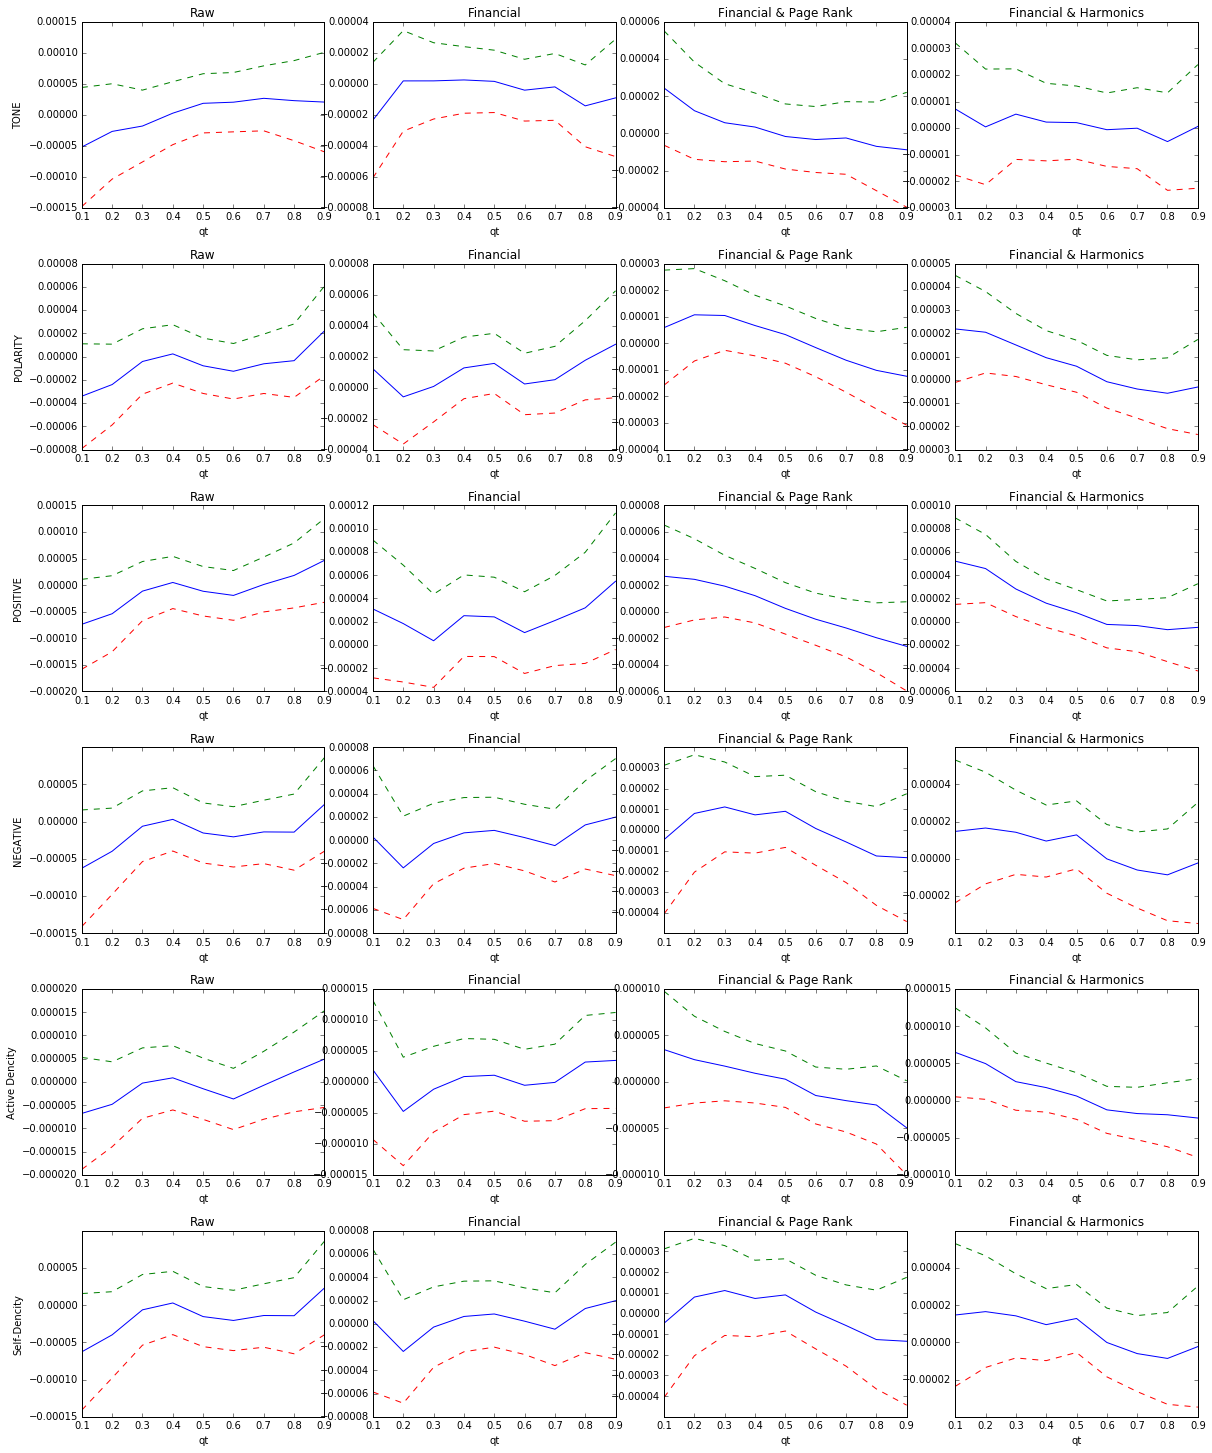

In [25]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24)) = plt.subplots(ncols=4, nrows=6,figsize=(20, 25))


quant_reg_plot(RT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax1, legend=False)
quant_reg_plot(FT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax2, legend=False)
quant_reg_plot(PR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax3, legend=False)
quant_reg_plot(HR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax4, legend=False)

ax1.set_ylabel("TONE")
ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax5, legend=False)
quant_reg_plot(FT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax6, legend=False)
quant_reg_plot(PR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax7, legend=False)
quant_reg_plot(HR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax8, legend=False)

ax5.set_ylabel("POLARITY")
ax5.set_title("Raw")
ax6.set_title("Financial")
ax7.set_title("Financial & Page Rank")
ax8.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax9, legend=False)
quant_reg_plot(FT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax10, legend=False)
quant_reg_plot(PR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax11, legend=False)
quant_reg_plot(HR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax12, legend=False)

ax9.set_ylabel("POSITIVE")
ax9.set_title("Raw")
ax10.set_title("Financial")
ax11.set_title("Financial & Page Rank")
ax12.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax13, legend=False)
quant_reg_plot(FT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax14, legend=False)
quant_reg_plot(PR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax15, legend=False)
quant_reg_plot(HR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax16, legend=False)

ax13.set_ylabel("NEGATIVE")
ax13.set_title("Raw")
ax14.set_title("Financial")
ax15.set_title("Financial & Page Rank")
ax16.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax17, legend=False)
quant_reg_plot(FT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax18, legend=False)
quant_reg_plot(PR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax19, legend=False)
quant_reg_plot(HR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax20, legend=False)

ax17.set_ylabel("Active Dencity")
ax17.set_title("Raw")
ax18.set_title("Financial")
ax19.set_title("Financial & Page Rank")
ax20.set_title("Financial & Harmonics")


quant_reg_plot(RT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax21, legend=False)
quant_reg_plot(FT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax22, legend=False)
quant_reg_plot(PR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax23, legend=False)
quant_reg_plot(HR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax24, legend=False)

ax21.set_ylabel("Self-Dencity")
ax21.set_title("Raw")
ax22.set_title("Financial")
ax23.set_title("Financial & Page Rank")
ax24.set_title("Financial & Harmonics")



fig.subplots_adjust(hspace=0.3)